# Script to analyze my SC25 project dataset (A22)

### Brief description of the experiment

**Context** Affective contagion can be affected  by social environment.  
**Hypothesis** When interacting with two agents, incongruent emotions expressed by agent 1 and agent 2 will dempen participants' affective decoding.  
**Experimental procedure** At each trial, participants from the SC25 TD were presented with two concomittant videos of Agent 1 and Agent 2. While Agent 1 verbalized an emotion with a neutral face, Agent 2 expressed a facial emotion which coud be congruent or not. We used 15 combinations of congruent ('C' trials)/non-congruent ('NC' trials) videos (i.e., 15 trials). The movies were presented for 15 seconds, and participants had 10 seconds to give their answer before the next trial.

### Analysis Steps

In [2]:
# LOAD THE NECESSARY LIBRARIES

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# if nedded, install new libraries through the Anaconda Powershell-prompt using:
# conda install -c conda-forge statsmodels, then:

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# CREATE A DATAFRAME FROM THE IMPORTED CSV WITH THE RESPONSE DATA

df = pd.read_csv('FinalData.csv', sep = ";")
# print(df) # 405 rows (n=27)

In [4]:
# DATA-CLEANING
# Only keep participants who used more than 3 types of response on a [0-10] scale:

df_filtered = df[df.groupby('Participant').Score.transform('var') > 2]
# print(df_filtered) #345 rows (n=23)

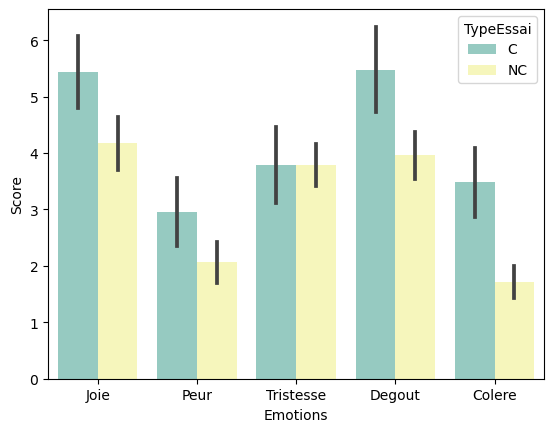

In [5]:
# PLOT THE RESULTS
# Visualize mean scores using a Barplot with standard errors:

sns.barplot(x="Emotions", y="Score", errorbar="se", hue="TypeEssai", data=df_filtered, palette="Set3")
plt.savefig('SC25_Gp_BarPlot.png')
plt.show()

In [6]:
# RUN A TWO-WAY ANOVA
# DV = 'Score', Factors = "Emotion" + "TypeEssai":

model = ols('Score ~ C(Emotions) + C(TypeEssai) + C(Emotions):C(TypeEssai)', data=df_filtered).fit()
ANOVAtable = sm.stats.anova_lm(model, typ=2)
ANOVAtable

,sum_sq,df,F,PR(>F)
C(Emotions),340.162319,4.0,10.772860,3.166040e-08
C(TypeEssai),90.579710,1.0,11.474552,7.895529e-04
C(Emotions):C(TypeEssai),29.028986,4.0,0.919341,4.527652e-01
Residual,2644.478261,335.0,NaN,NaN


**Interpretation** The 2-way ANOVA confirmed a significant difference in mean scores between emotions (p<3.16e-08) as well as between trial types (p<7.89e-04). However, no interaction between emotions and trial types were evidenced.

In [7]:
# RUN A POST-HOC COMPARISON
# Look how scores changed between 'C' and 'NC' trials:

tukey = pairwise_tukeyhsd(endog=df_filtered['Score'],
                          groups=df_filtered['TypeEssai'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     C     NC   -1.087 0.0014 -1.7528 -0.4211   True
----------------------------------------------------


**Interpretation** The Tukey post-hoc test confirmed a significant decrease in the mean scores (1.1 pt on average) of 'NC' trials compared to 'C' trials (p<0.0014).